# HMW Spectral Clustering

## Data Extraction and Visualization

In [23]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, normalized_mutual_info_score

In [24]:
# File paths for datasets
CIRCLE_PATH = r"data\Circle.csv"
SPIRAL_PATH = r"data\Spiral.csv"

# Column names for datasets
CIRCLE_COL_NAMES = ["x", "y"]
SPIRAL_COL_NAMES = ["x", "y", "cluster"]

# Load the Circle dataset
circle_df = pd.read_csv(CIRCLE_PATH, header=None, names=CIRCLE_COL_NAMES)

# Load the Spiral dataset
spiral_df = pd.read_csv(SPIRAL_PATH, header=None, names=SPIRAL_COL_NAMES)

# Prepare datasets for visualization
datasets = {"Circle": circle_df.values,
            "Spiral": spiral_df[["x", "y"]].values}

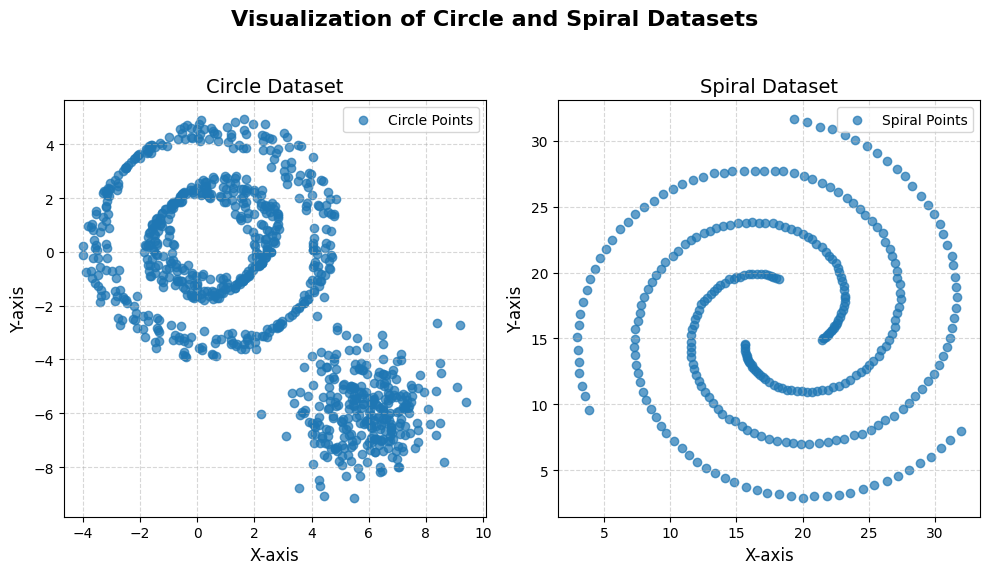

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Visualization of Circle and Spiral Datasets", fontsize=16, fontweight="bold")

# Plot the Circle dataset
axes[0].scatter(
    datasets["Circle"][:, 0], datasets["Circle"][:, 1],
    alpha=0.7, label="Circle Points"
)
axes[0].set_title("Circle Dataset", fontsize=14)
axes[0].set_xlabel("X-axis", fontsize=12)
axes[0].set_ylabel("Y-axis", fontsize=12)
axes[0].grid(linestyle='--', alpha=0.5)
axes[0].legend()

# Plot the Spiral dataset
axes[1].scatter(
    datasets["Spiral"][:, 0], datasets["Spiral"][:, 1],
    alpha=0.7, label="Spiral Points"
)
axes[1].set_title("Spiral Dataset", fontsize=14)
axes[1].set_xlabel("X-axis", fontsize=12)
axes[1].set_ylabel("Y-axis", fontsize=12)
axes[1].grid(linestyle='--', alpha=0.5)
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

## Requirement 1

In [26]:
# Requirement 1
from knn_similarity_graph import get_knn_similarity_graph

# Define k values for k-NN and mutuality settings
k_neighbors_values = [10, 20, 40]  
is_mutual_knn = [False, True] 

# Initialize a dictionary to store similarity graphs for each dataset
similarity_graphs = {dataset_name: {} for dataset_name in datasets.keys()}

for dataset_name, dataset in datasets.items():
    for k_neighbors in k_neighbors_values:
        for mutual_knn in is_mutual_knn:
            # Construct the key name based on mutuality
            knn_type = "mutual" if mutual_knn else "regular"
            graph_key_name = f"W_{k_neighbors}_{knn_type}"  # e.g., "W_10_regular"
            
            # Generate and store the k-NN similarity graph
            knn_similarity_graph = get_knn_similarity_graph(X=dataset, k=k_neighbors, mutuality=mutual_knn)
            similarity_graphs[dataset_name][graph_key_name] = knn_similarity_graph

# Display keys for verification
print("similarity_graphs: data --> k & mutuality")
print(list(similarity_graphs.keys()))  # Dataset names
print(list(similarity_graphs["Circle"].keys()))  # Graph configuration keys for "Circle" dataset

similarity_graphs: data --> k & mutuality
['Circle', 'Spiral']
['W_10_regular', 'W_10_mutual', 'W_20_regular', 'W_20_mutual', 'W_40_regular', 'W_40_mutual']


## Requirement 2

In [27]:
# Requirement 2
from laplacian_matrix import get_laplacian_matrix

# Initialize the dictionary to store Laplacian, Adjacency, and Degree matrices
graph_matrices = {dataset: {} for dataset in similarity_graphs.keys()}

for dataset_name, dataset in datasets.items():
    for k_neighbors in k_neighbors_values:
        for mutual_knn in is_mutual_knn:
            # Construct the key name based on mutuality
            knn_type = "mutual" if mutual_knn else "regular"
            laplacian_key = f"L_{k_neighbors}_{knn_type}"  # e.g., "L_10_regular"
            # Generate and store the matrices
            laplacian, adjacency, degree = get_laplacian_matrix(X=dataset, k=k_neighbors, mutuality=mutual_knn, sparse=True)

            graph_matrices[dataset_name][laplacian_key] = {"Laplacian": laplacian,
                                                           "Adjacency": adjacency,
                                                           "Degree": degree}

# Display the keys to verify
print("graph_matrices: data --> k & mutuality -- > Laplacian, Adjacency, Degree")
print(graph_matrices.keys())  # Dataset names
print(graph_matrices["Circle"].keys())  # Laplacian matrix keys for "Circle"
print(graph_matrices["Circle"]["L_10_mutual"].keys())  # Keys for matrices of a specific graph

graph_matrices: data --> k & mutuality -- > Laplacian, Adjacency, Degree
dict_keys(['Circle', 'Spiral'])
dict_keys(['L_10_regular', 'L_10_mutual', 'L_20_regular', 'L_20_mutual', 'L_40_regular', 'L_40_mutual'])
dict_keys(['Laplacian', 'Adjacency', 'Degree'])


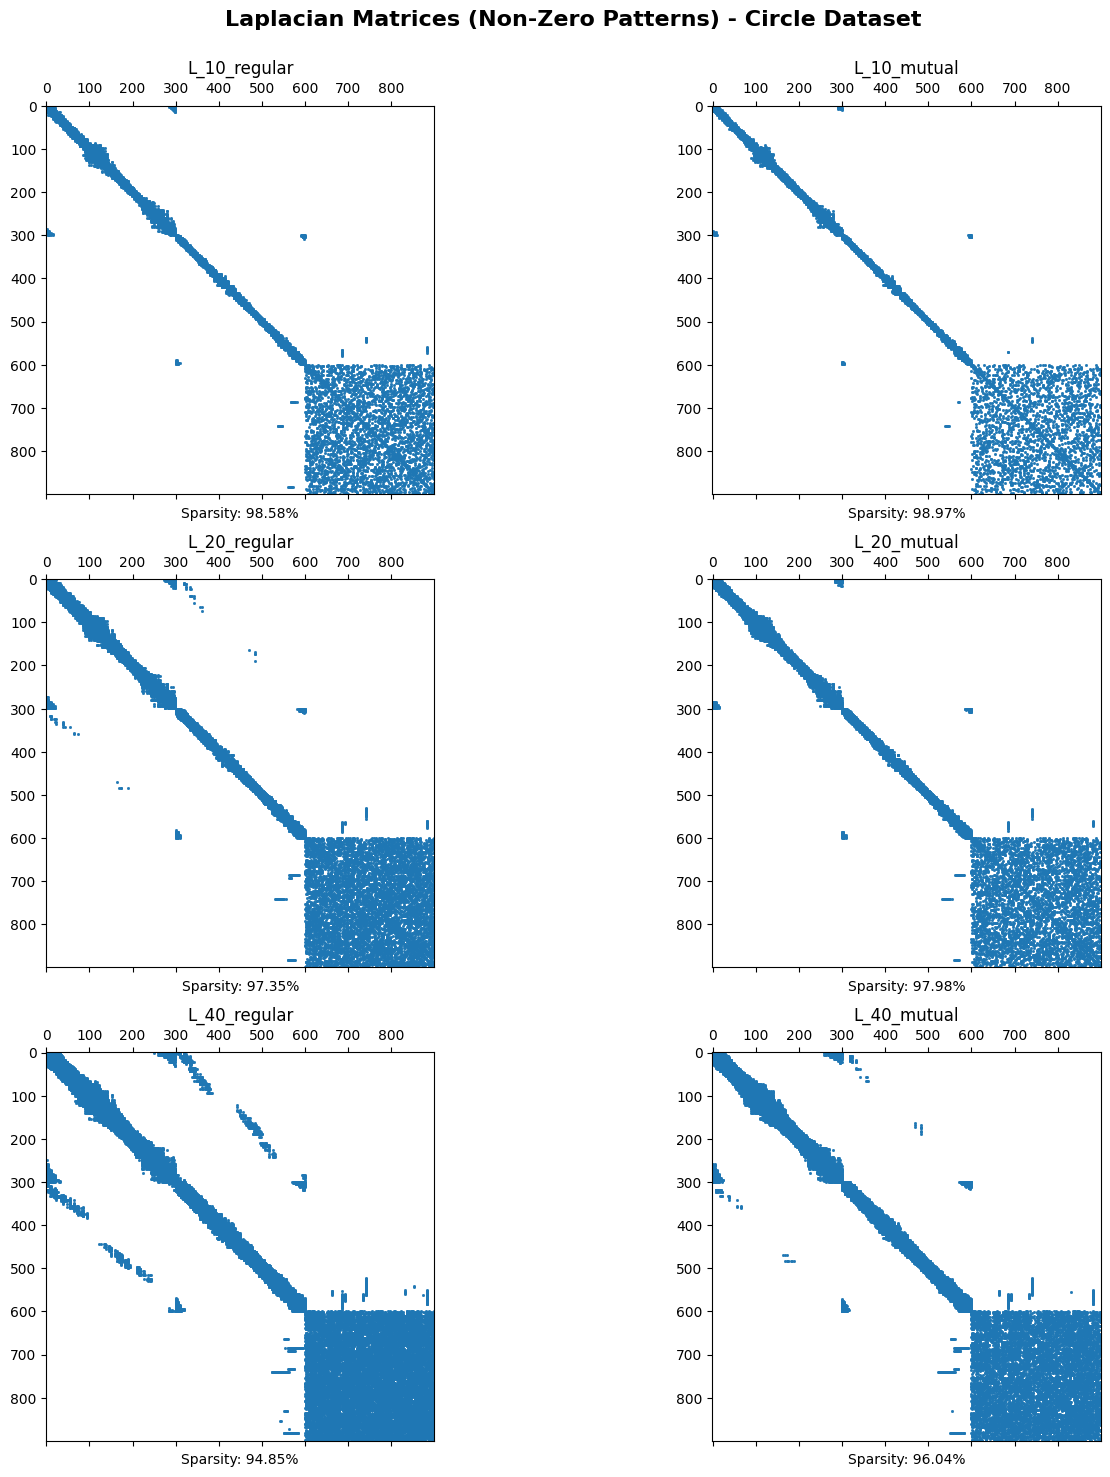

In [28]:
# Display sparsity patterns of the Laplacian matrices Circle dataset
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Laplacian Matrices (Non-Zero Patterns) - Circle Dataset", fontsize=16, fontweight="bold")

for idx, (laplacian_name, matrices) in enumerate(graph_matrices["Circle"].items()):
    row, col = divmod(idx, 2)
    laplacian = matrices["Laplacian"]

    ax = axes[row, col]
    ax.spy(laplacian, markersize=1)  
    sparsity = 1.0 - laplacian.nnz / np.prod(laplacian.shape)  

    
    ax.set_title(f"{laplacian_name}", fontsize=12)
    ax.text(0.5, -0.05, f"Sparsity: {sparsity:.2%}",transform=ax.transAxes,fontsize=10,ha="center",va="center",)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

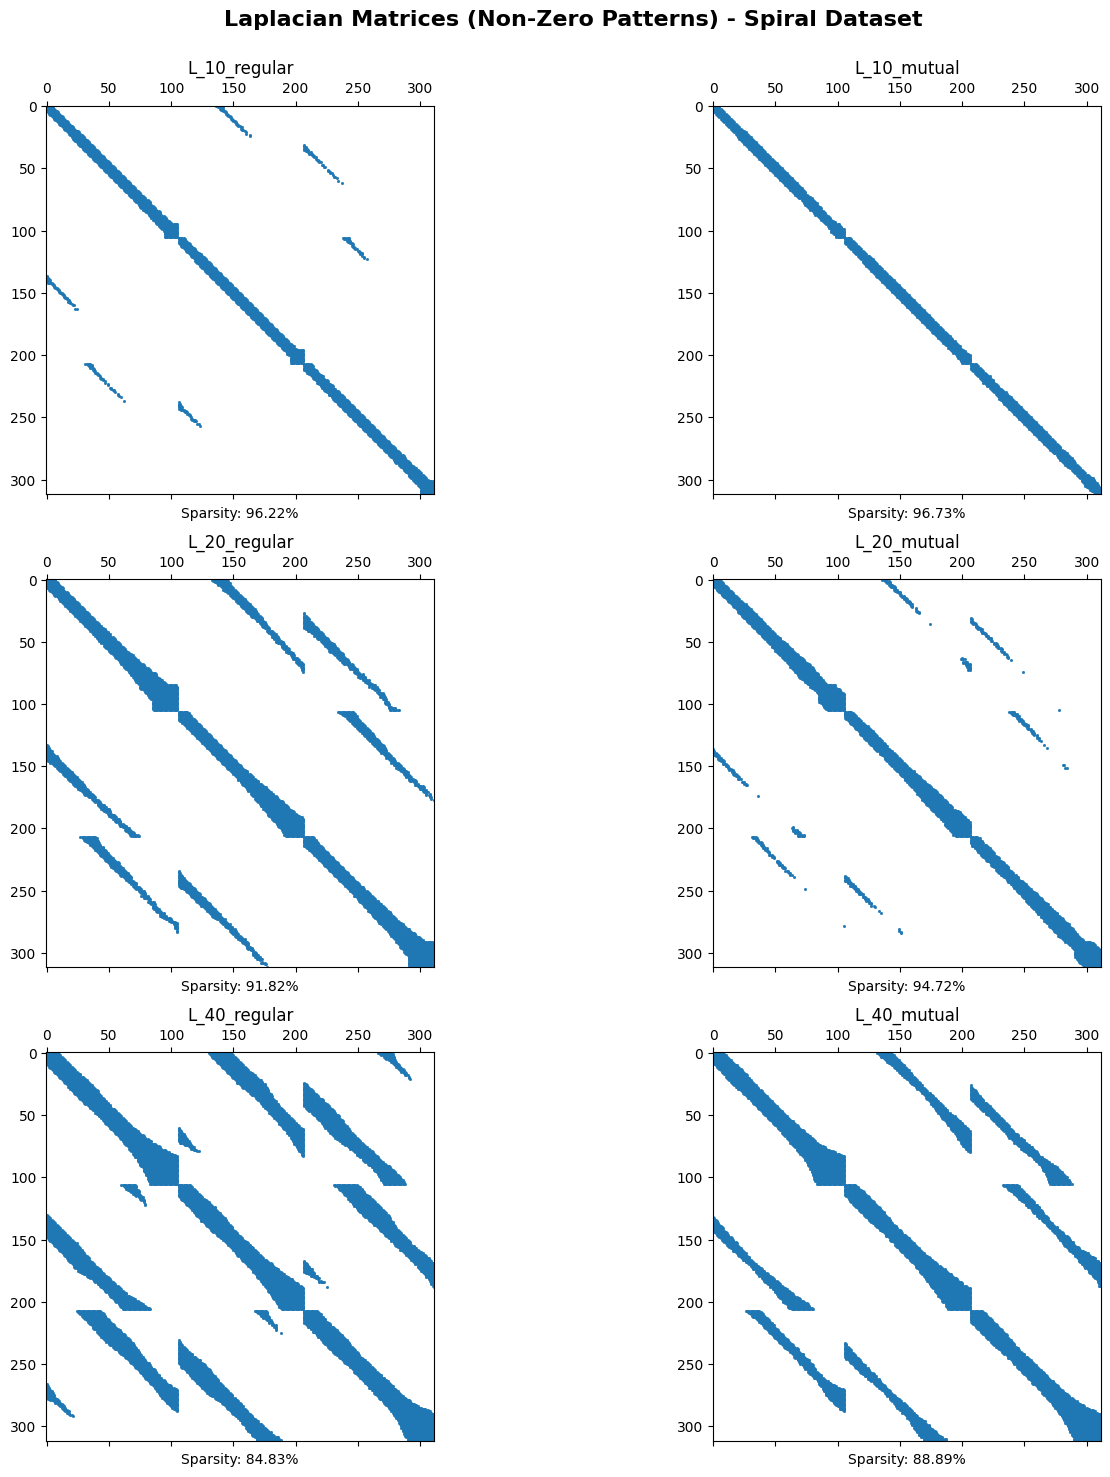

In [29]:
# Display sparsity patterns of the Laplacian matrices Spiral dataset
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Laplacian Matrices (Non-Zero Patterns) - Spiral Dataset", fontsize=16, fontweight="bold")

for idx, (laplacian_name, matrices) in enumerate(graph_matrices["Spiral"].items()):
    row, col = divmod(idx, 2)
    laplacian = matrices["Laplacian"]

    ax = axes[row, col]
    ax.spy(laplacian, markersize=1)  
    sparsity = 1.0 - laplacian.nnz / np.prod(laplacian.shape)  

    ax.set_title(f"{laplacian_name}", fontsize=12)
    ax.text(0.5, -0.05, f"Sparsity: {sparsity:.2%}",transform=ax.transAxes,fontsize=10,ha="center",va="center")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Requirement 3

In [30]:
# Requirement 3
from connected_components import count_connected_components_with_scipy, count_connected_components_with_traversal

# settings for printing a decent tabular representation of the data
columns = ["Dataset", "k", "Mutuality", "SciPy", "BFS", "DFS"]
col_widths = [10, 4, 10, 8, 8, 8]

header = " | ".join(f"{col:<{width}}" for col, width in zip(columns, col_widths))
separator = "-" * len(header)
print(header)
print(separator)

for dataset_name, laplacians in graph_matrices.items():
    for laplacian_key, laplacian_matrices in laplacians.items():
        adjacency_matrix = laplacian_matrices["Adjacency"]

        # Parse k and mutuality from the Laplacian key
        _, k_str, mutual_str = laplacian_key.split('_')
        k = int(k_str)
        mutuality = "Mutual" if mutual_str == "mutual" else "Regular"

        # Compute connected components for all methods
        n_scipy = count_connected_components_with_scipy(adjacency_matrix)
        n_bfs = count_connected_components_with_traversal(adjacency_matrix, method="BFS")
        n_dfs = count_connected_components_with_traversal(adjacency_matrix, method="DFS")

        # Print row
        print(
            f"{dataset_name:<{col_widths[0]}} | "
            f"{k:<{col_widths[1]}} | "
            f"{mutuality:<{col_widths[2]}} | "
            f"{n_scipy:<{col_widths[3]}} | "
            f"{n_bfs:<{col_widths[4]}} | "
            f"{n_dfs:<{col_widths[5]}}"
        )

Dataset    | k    | Mutuality  | SciPy    | BFS      | DFS     
---------------------------------------------------------------
Circle     | 10   | Regular    | 2        | 2        | 2       
Circle     | 10   | Mutual     | 7        | 7        | 7       
Circle     | 20   | Regular    | 1        | 1        | 1       
Circle     | 20   | Mutual     | 2        | 2        | 2       
Circle     | 40   | Regular    | 1        | 1        | 1       
Circle     | 40   | Mutual     | 1        | 1        | 1       
Spiral     | 10   | Regular    | 1        | 1        | 1       
Spiral     | 10   | Mutual     | 3        | 3        | 3       
Spiral     | 20   | Regular    | 1        | 1        | 1       
Spiral     | 20   | Mutual     | 1        | 1        | 1       
Spiral     | 40   | Regular    | 1        | 1        | 1       
Spiral     | 40   | Mutual     | 1        | 1        | 1       


## Requirement 4

In [31]:
# Requirement 4
from iterative_power_methods import get_smallest_eigenvalues

# Initialize the dictionary to store eigenvalues
results = {}  # Structure: results[dataset][k][mutual] = eigenvalues

print("Starting eigenvalue computation for all datasets...\n")

for dataset_name, laplacians in graph_matrices.items():
    print(f"  Processing dataset: {dataset_name}")
    results[dataset_name] = {}  # Initialize the inner dictionary for each dataset
    
    for laplacian_key, laplacian_matrices in laplacians.items():
        # Extract the Laplacian matrix
        laplacian_matrix = laplacian_matrices["Laplacian"]

        # Parse k and mutuality from the Laplacian key (e.g., "L_10_regular")
        _, k_str, mutual_str = laplacian_key.split('_')
        k = k_str  # Keep k as a string for dictionary keys
        mutual = "Mutual" if mutual_str == "mutual" else "Regular"
        
        # Print progress
        print(f"    Computing eigenvalues for k={k}, Mutuality={mutual}...")

        # Compute the smallest eigenvalues
        eigenvalues = get_smallest_eigenvalues(X=laplacian_matrix, M=20)
        print(f"    Computed {len(eigenvalues)} eigenvalues: {eigenvalues[:5]}...")  

        # Initialize nested dictionaries if they don't exist
        if k_str not in results[dataset_name]:
            results[dataset_name][k_str] = {}
        if mutual not in results[dataset_name][k_str]:
            results[dataset_name][k_str][mutual] = []

        if hasattr(eigenvalues, 'tolist'):
            eigenvalues = eigenvalues.tolist()

        # Store the eigenvalues
        results[dataset_name][k_str][mutual] = eigenvalues  

    print(f"  Finished processing dataset: {dataset_name}\n")

print("Eigenvalue computation complete for all datasets!")

Starting eigenvalue computation for all datasets...

  Processing dataset: Circle
    Computing eigenvalues for k=10, Mutuality=Regular...
----> Computing 20 smallest eigenvalues of the matrix...
        Eigenvalue 1 is near zero; maintaining shift at 1.0e-06
        Eigenvalue 2 is near zero; maintaining shift at 1.0e-06
----> Eigenvalue computation complete.
    Computed 20 eigenvalues: [np.float64(5.701116187755047e-16), np.float64(1.5160528150389265e-15), np.float64(0.004821604706938693), np.float64(0.028585599496898668), np.float64(0.042474376147840366)]...
    Computing eigenvalues for k=10, Mutuality=Mutual...
----> Computing 20 smallest eigenvalues of the matrix...
        Eigenvalue 1 is near zero; maintaining shift at 1.0e-06
        Eigenvalue 2 is near zero; maintaining shift at 1.0e-06
        Eigenvalue 3 is near zero; maintaining shift at 1.0e-06
        Eigenvalue 4 is near zero; maintaining shift at 1.0e-06
        Eigenvalue 5 is near zero; maintaining shift at 1.0e-0

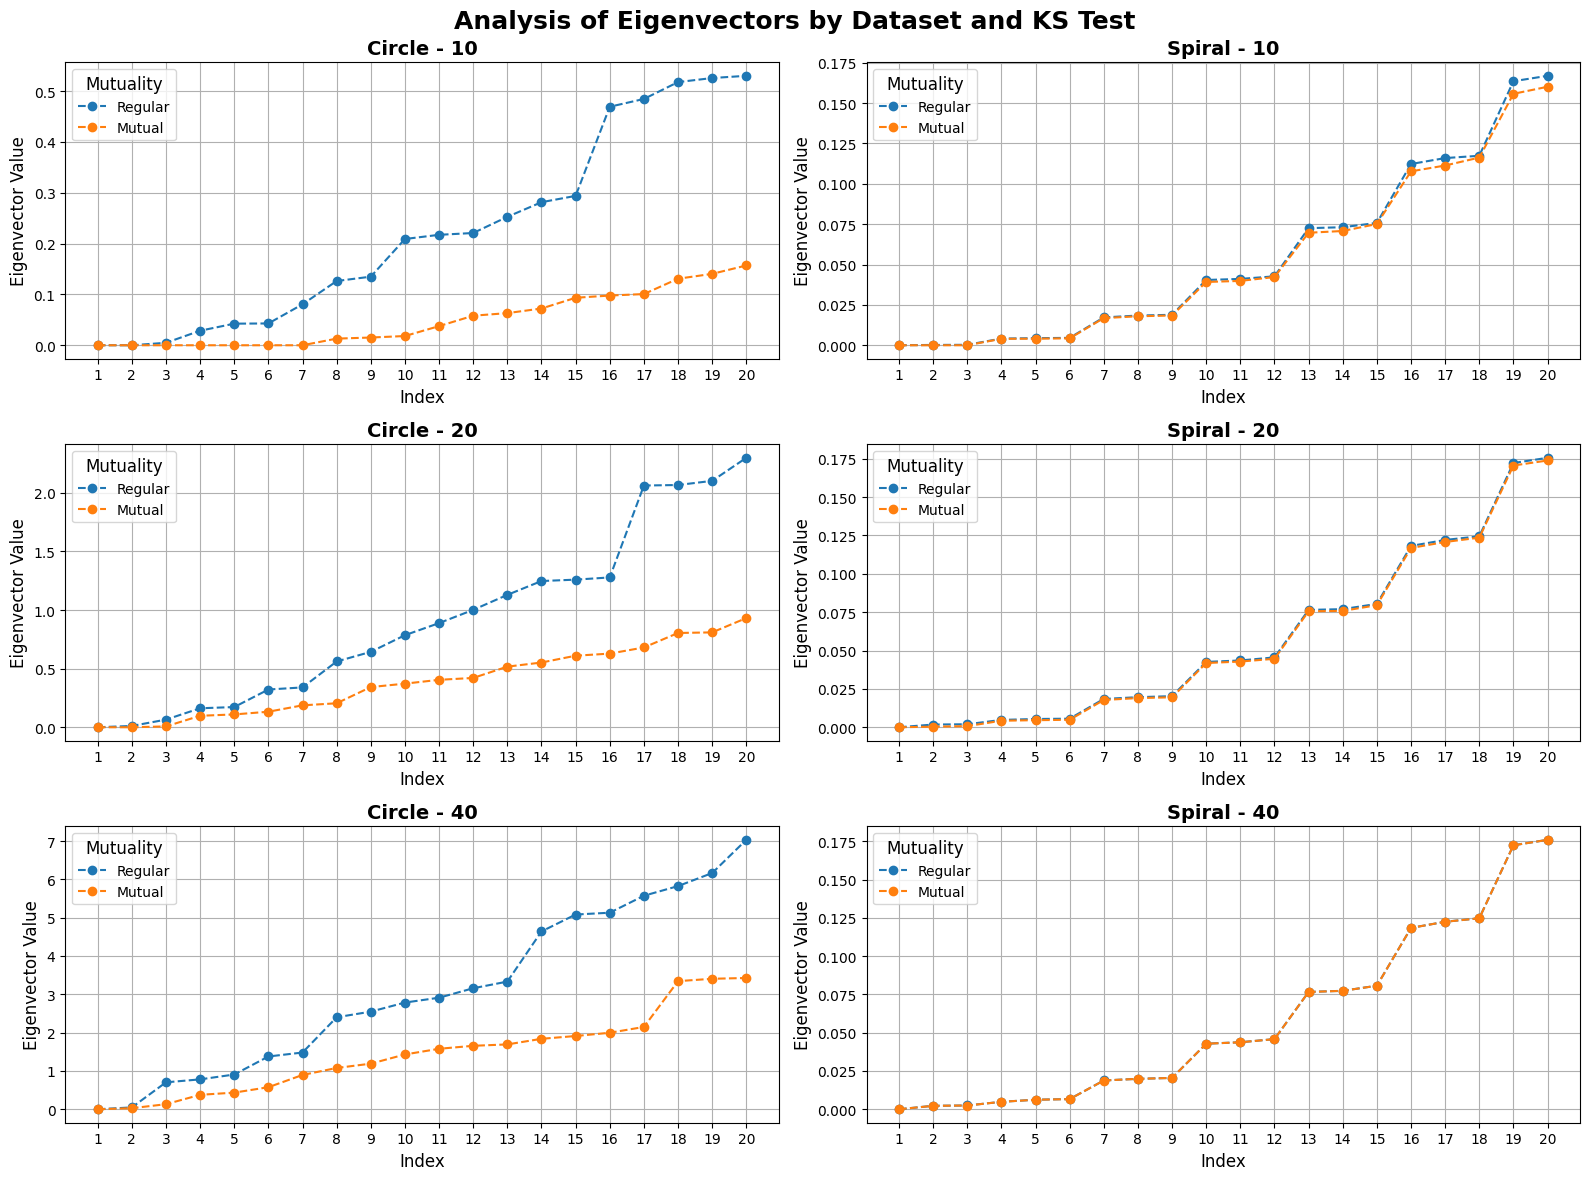

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("Analysis of Eigenvectors by Dataset and KS Test", fontsize=18, fontweight="bold")

for i, (dataset_name, dataset_result) in enumerate(results.items()):
    for j, (ks_result, mutuality_result) in enumerate(dataset_result.items()):
        ax = axes[j, i]
        for mutuality_name, eigenvectors in mutuality_result.items():

            ax.plot(range(1, len(eigenvectors) + 1), eigenvectors, label=mutuality_name, marker='o', linestyle="--")
        
        ax.set_title(f"{dataset_name} - {ks_result}", fontsize=14, fontweight="semibold")
        ax.set_xlabel("Index", fontsize=12)
        ax.set_ylabel("Eigenvector Value", fontsize=12)
        ax.set_xticks(range(1, len(eigenvectors) + 1))
        ax.legend(title="Mutuality", fontsize=10, title_fontsize=12)
        ax.grid(visible=True)
        
plt.tight_layout()
plt.show()

## Requirement 5

In [33]:
# Requirement 5
from eigen_pairs import get_smallest_eigenpairs

# Dictionary to store eigenvectors for each dataset and configuration
laplacian_eigenvectors = {}

# Define the list of M values (number of smallest eigenvectors to compute)
Ms = [2, 3, 4, 5, 6, 7]

for dataset_name, dataset_result in graph_matrices.items():
    laplacian_eigenvectors[dataset_name] = {}  # Initialize dataset-level storage

    for laplacian_name, laplacian_matrices in dataset_result.items():
        laplacian_matrix = laplacian_matrices["Laplacian"]

        _, k_str, mutual_str = laplacian_name.split('_')
        mutuality_type = "Mutual" if mutual_str == "mutual" else "Regular"

        if k_str not in laplacian_eigenvectors[dataset_name]:
            laplacian_eigenvectors[dataset_name][k_str] = {}
        
        if mutuality_type not in laplacian_eigenvectors[dataset_name][k_str]:
            laplacian_eigenvectors[dataset_name][k_str][mutuality_type] = {}

        # Compute the maximum M eigenpairs (eigenvalues and eigenvectors)
        max_m = max(Ms)
        eigenvalues, eigenvectors = get_smallest_eigenpairs(X=laplacian_matrix, M=max_m)

        # Store the first m eigenvectors for each value of M in Ms
        for m in Ms:
            laplacian_eigenvectors[dataset_name][k_str][mutuality_type][f"U_{m}"] = eigenvectors[:, :m]

print("Eigenvector computation complete!")

Eigenvector computation complete!


## Requirement 6

In [34]:
# Requirement 6
# Dictionary to store cluster labels
cluster_labels = {}

for dataset_name, dataset_result in laplacian_eigenvectors.items():
    cluster_labels[dataset_name] = {}  # Initialize dataset-level storage
    for k_str, k_result in dataset_result.items():
        cluster_labels[dataset_name][k_str] = {}  # Initialize k-level storage
        for mutuality_type, mutuality_result in k_result.items():
            cluster_labels[dataset_name][k_str][mutuality_type] = {}  # Initialize mutuality-level storage
            
            for U_name, U in mutuality_result.items():            
                # Parse the number of clusters (e.g., U_5 -> 5 clusters)
                n_clusters = int(U_name.split('_')[-1])

                # Apply k-means clustering
                kmeans = KMeans(n_clusters=n_clusters, random_state=42)
                labels = kmeans.fit_predict(U)

                # Store the cluster labels
                cluster_labels[dataset_name][k_str][mutuality_type][U_name] = labels.tolist()

print("k-means clustering complete!\n")

k-means clustering complete!



# Requirements 7-8

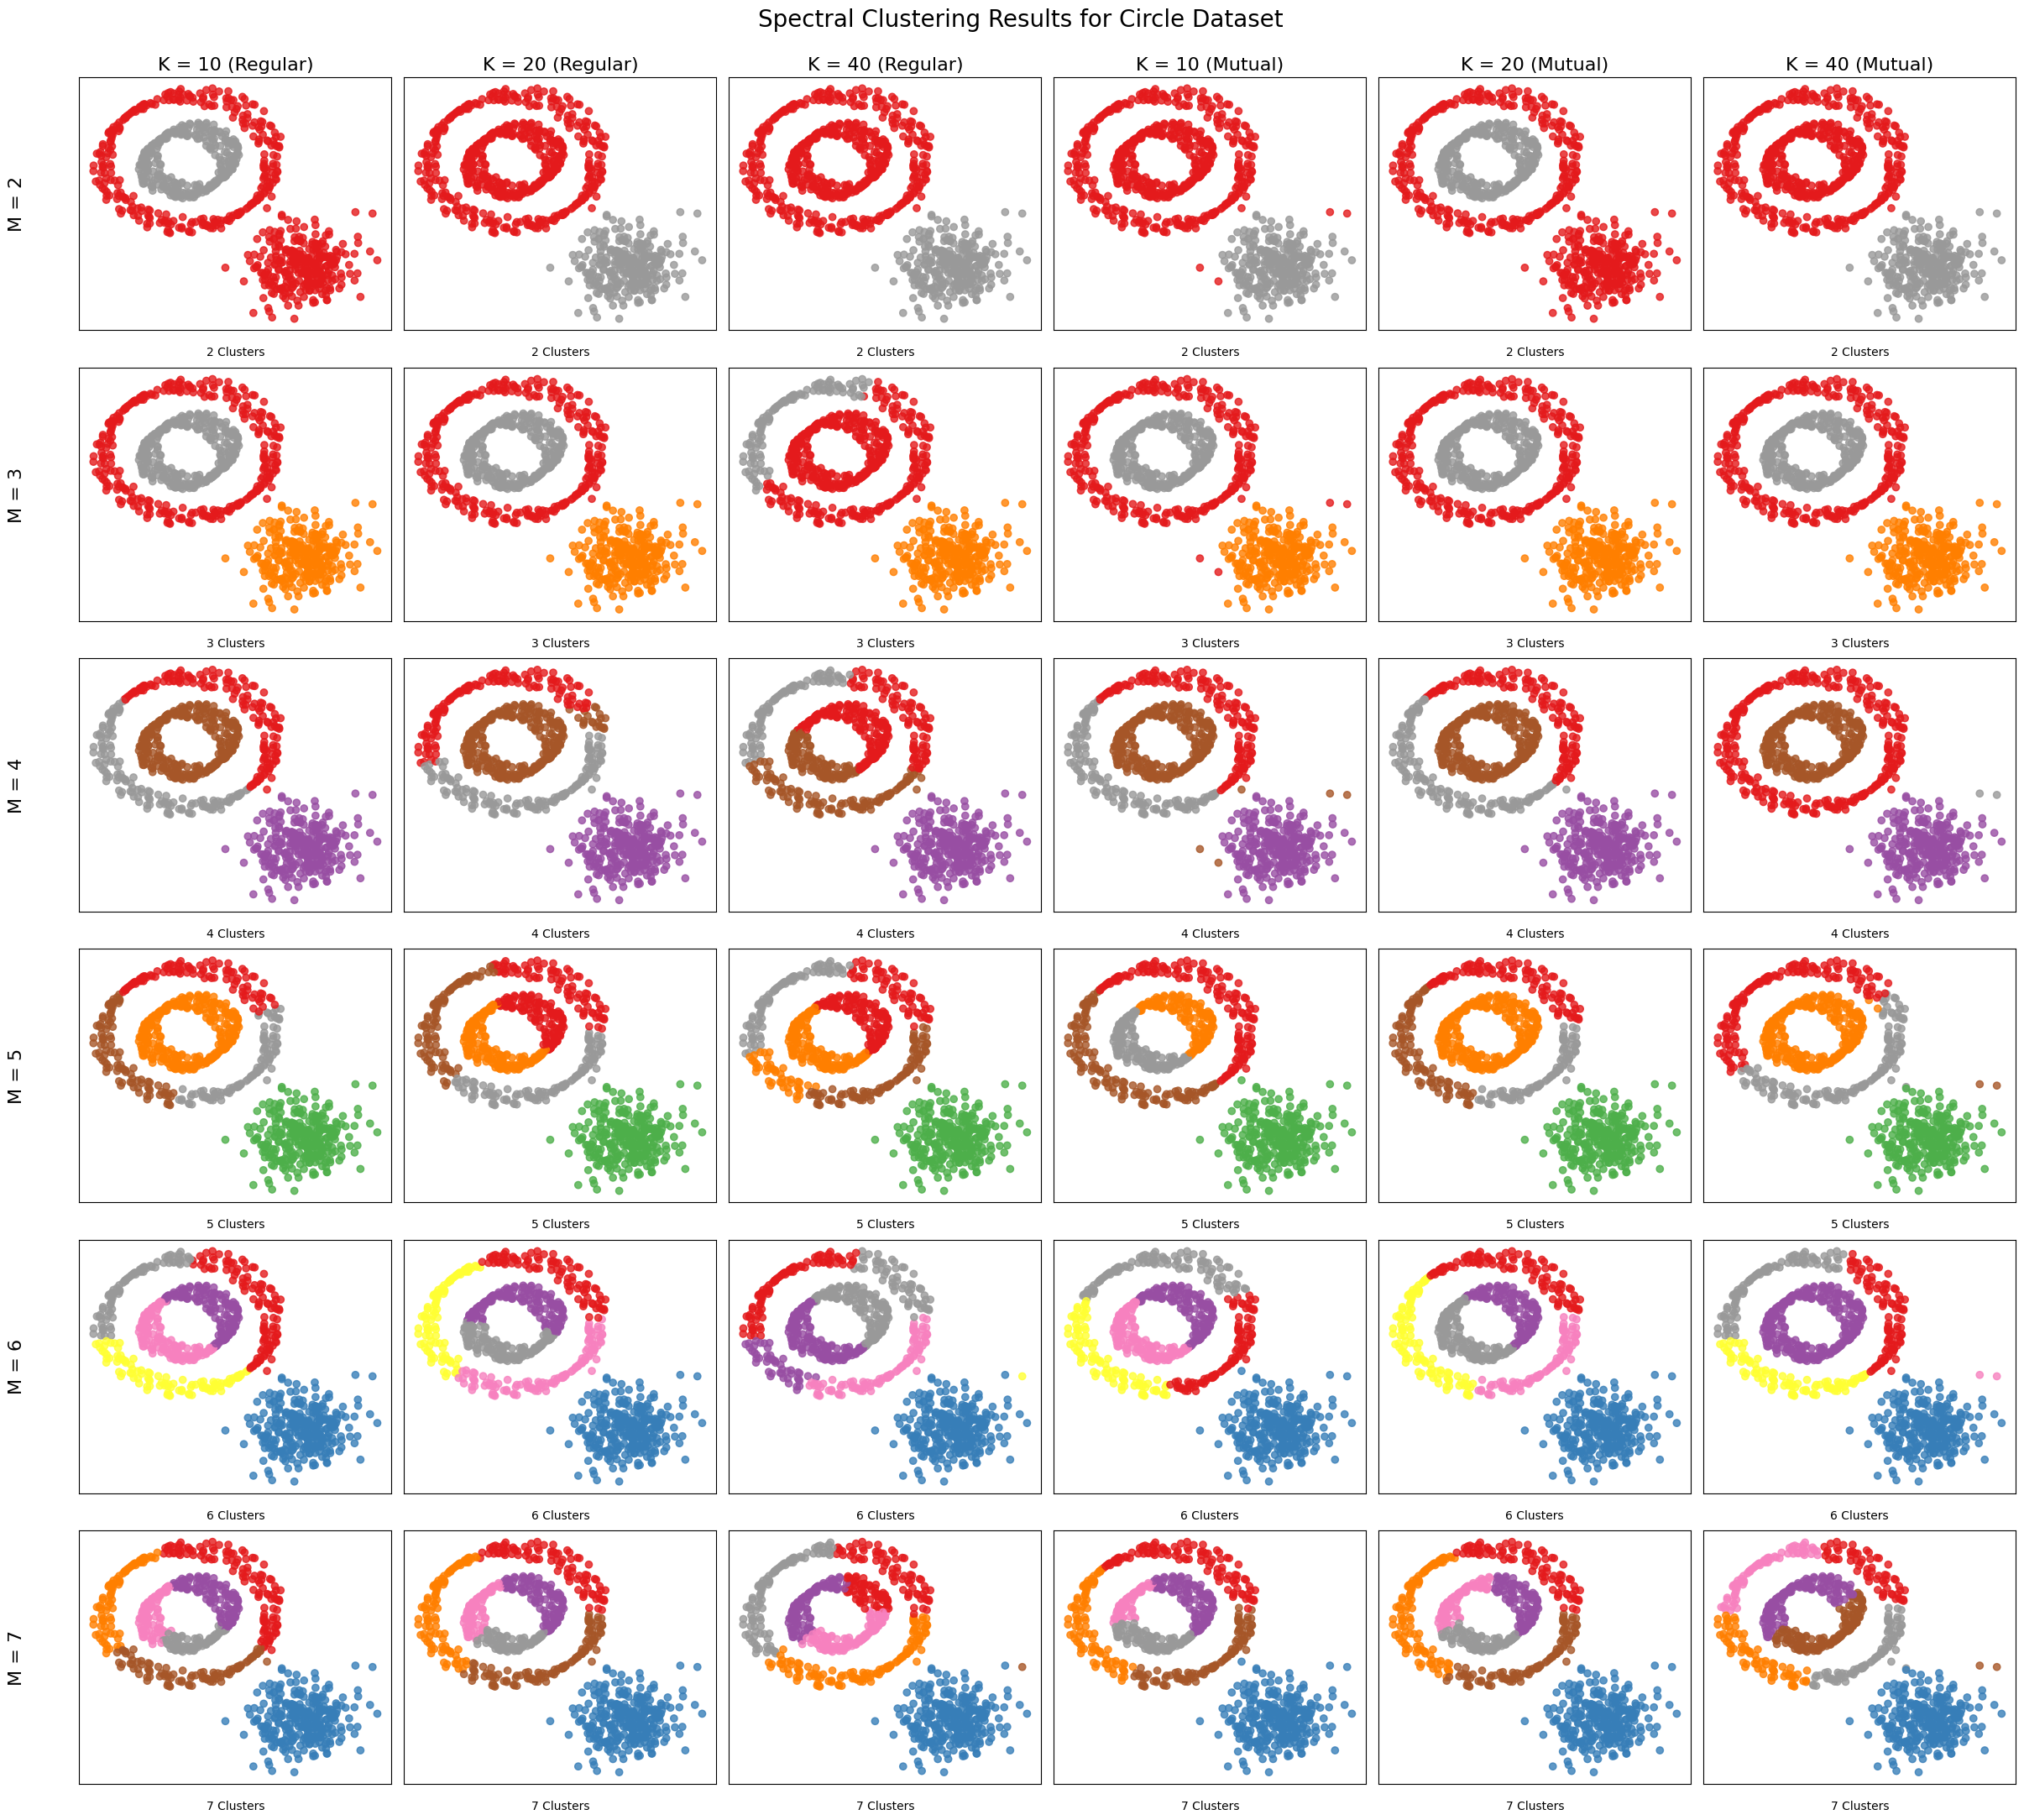

In [35]:
# Define K values and M values
k_values = [10, 20, 40]
m_values = range(2, 8)

fig, axes = plt.subplots(len(m_values), 6, figsize=(24, 24))  # 6 columns: 3 for Regular, 3 for Mutual
fig.suptitle("Spectral Clustering Results for Circle Dataset", fontsize=20, y=0.95)

# Add column titles for K values with Mutuality
for col, (k, mutuality) in enumerate([(k, "Regular") for k in k_values] + [(k, "Mutual") for k in k_values]):
    axes[0, col].set_title(f"K = {k} ({mutuality})", fontsize=16)

# Add row titles for M values
for row, m in enumerate(m_values):
    axes[row, 0].annotate(f"M = {m}", xy=(-0.2, 0.5), xycoords='axes fraction', fontsize=16, rotation=90, ha='center', va='center')

# Plot the data
for col, (k, mutuality) in enumerate([(k, "Regular") for k in k_values] + [(k, "Mutual") for k in k_values]):
    for row, m in enumerate(m_values):
        U_key = f"U_{m}"  # U_m corresponds to the number of clusters (M)

        # Access labels
        labels = cluster_labels["Circle"][str(k)][mutuality][U_key]
        
        # Plot scatter for the current K, M, and mutuality
        ax = axes[row, col]
        scatter = ax.scatter(datasets["Circle"][:, 0], datasets["Circle"][:, 1],c=labels, cmap='Set1', alpha=0.8)
        ax.set_xticks([])
        ax.set_yticks([])

        ax.text(0.5, -0.1, f"{len(set(labels))} Clusters", transform=ax.transAxes, fontsize=10, ha="center", color="black")

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

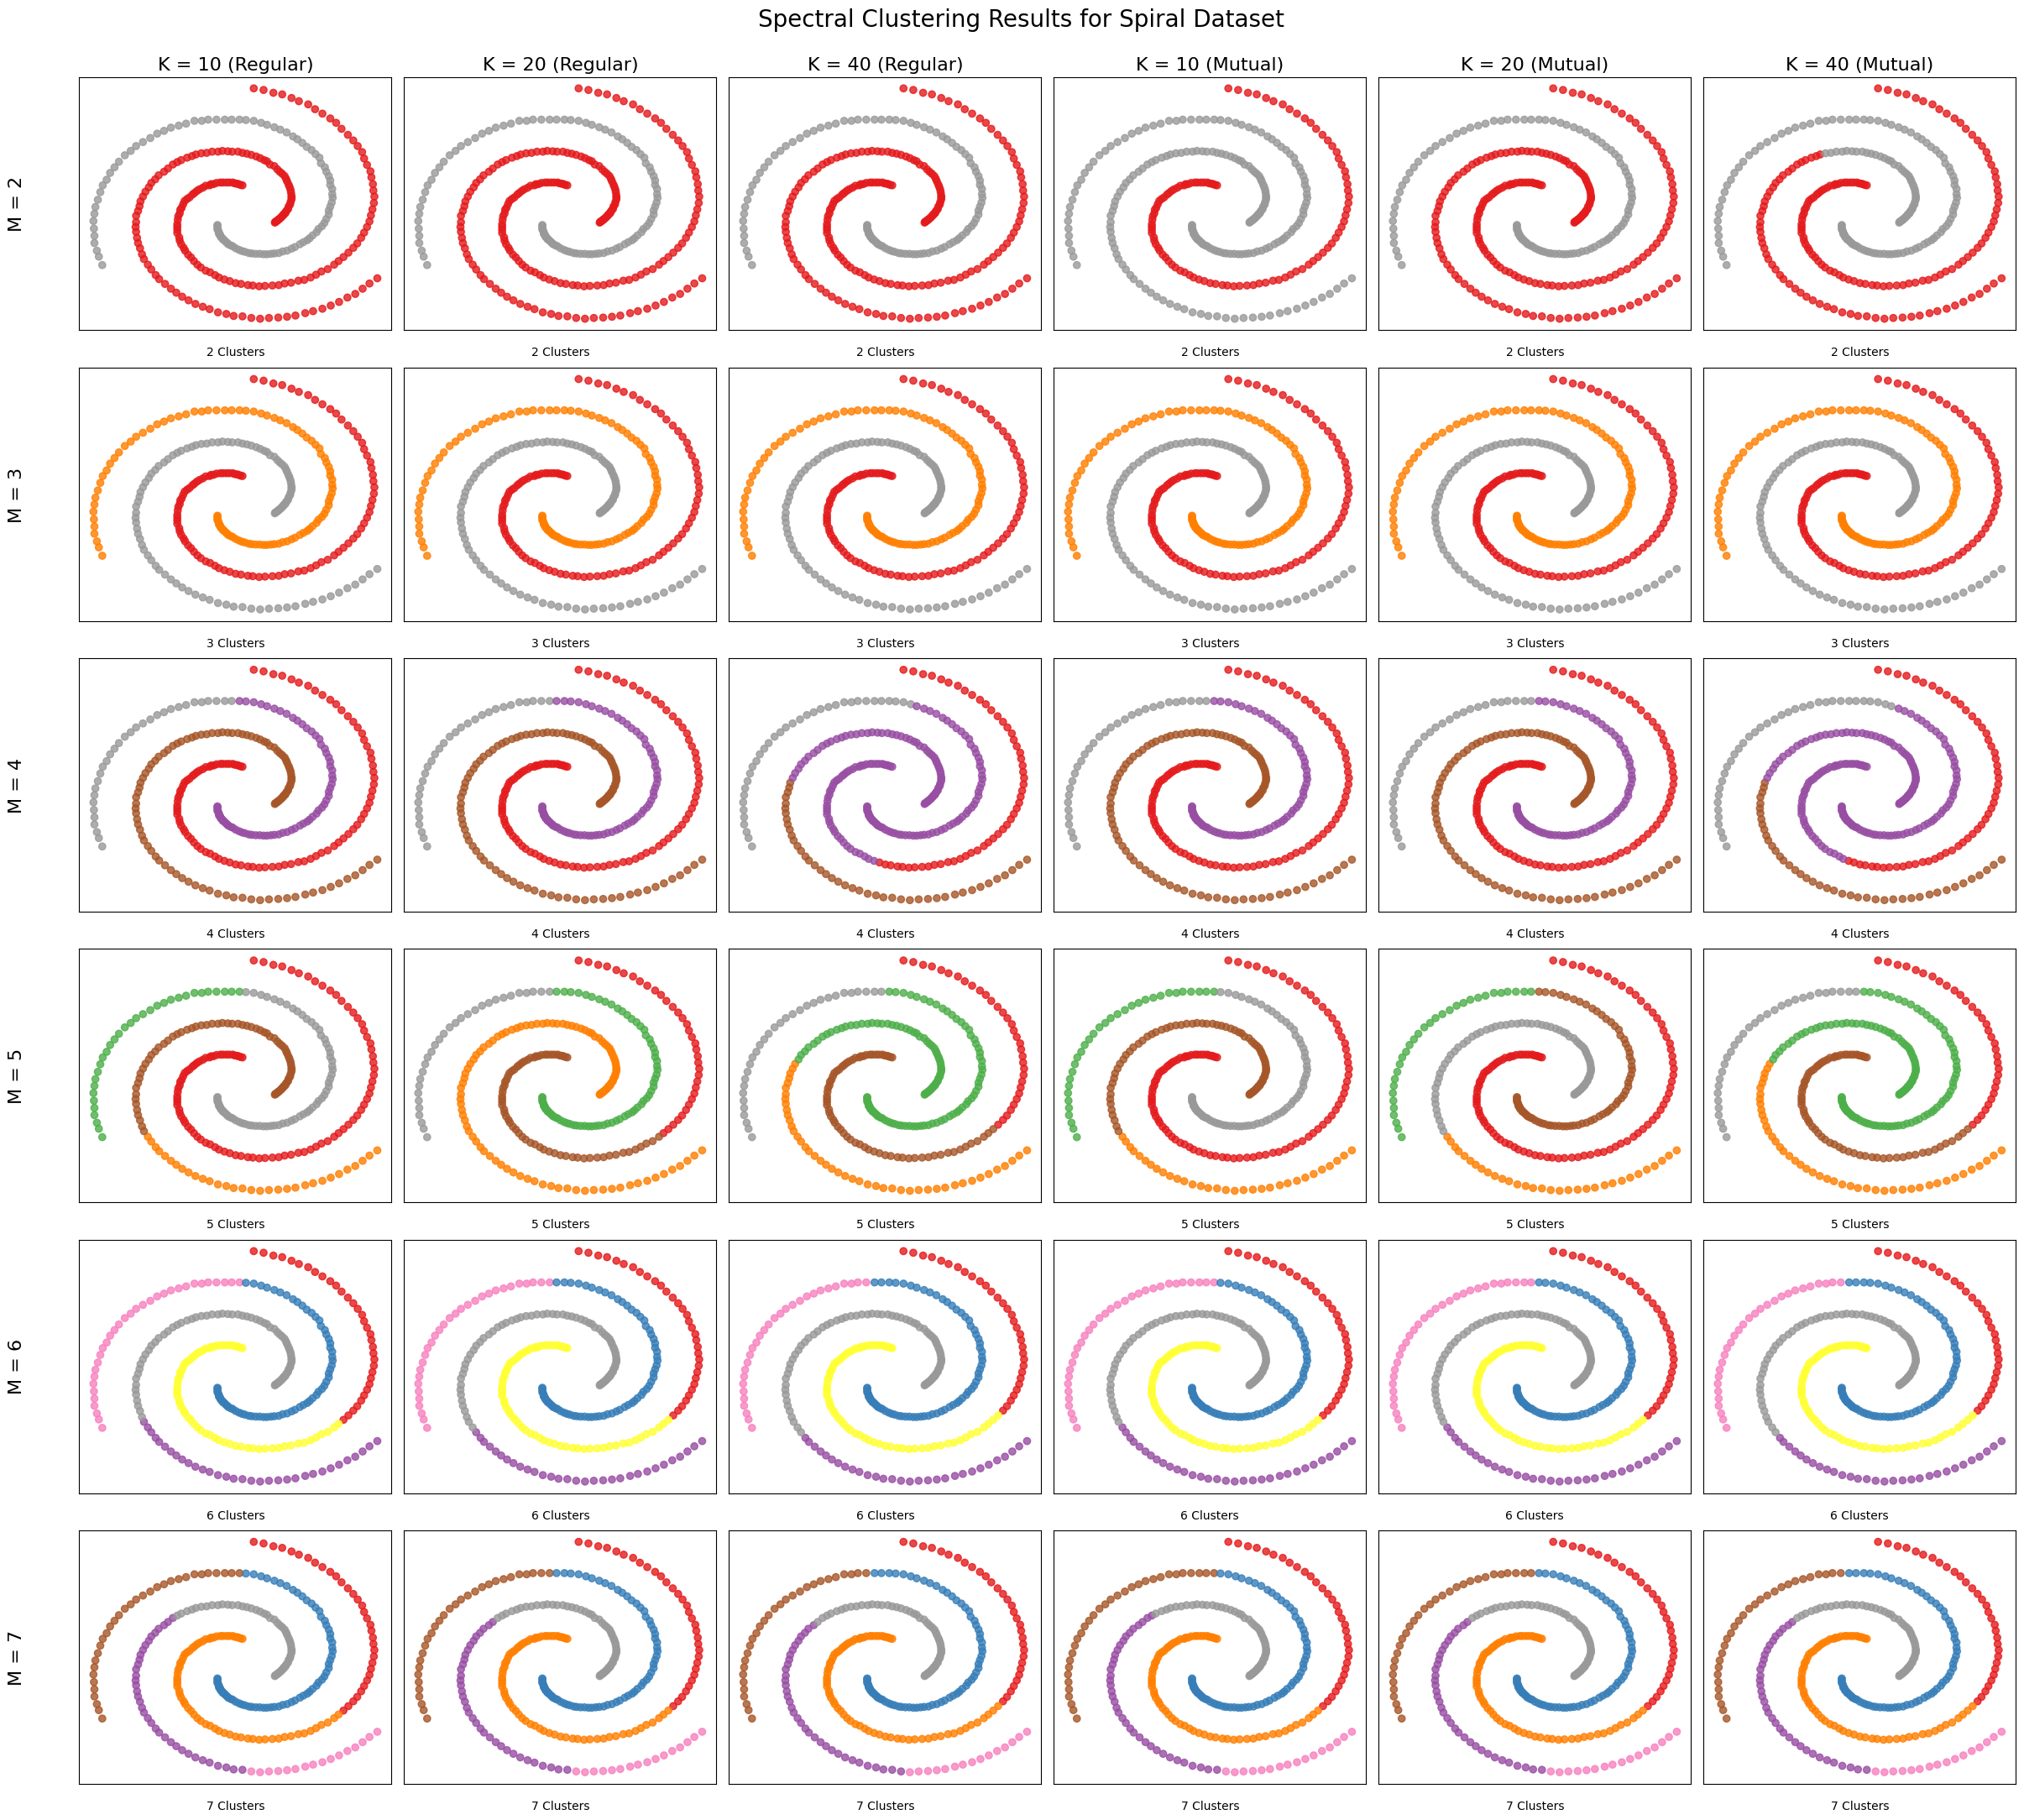

In [36]:
fig, axes = plt.subplots(len(m_values), 6, figsize=(24, 24))  # 6 columns: 3 for Regular, 3 for Mutual
fig.suptitle("Spectral Clustering Results for Spiral Dataset", fontsize=20, y=0.95)

# Add column titles for K values with Mutuality
for col, (k, mutuality) in enumerate([(k, "Regular") for k in k_values] + [(k, "Mutual") for k in k_values]):
    axes[0, col].set_title(f"K = {k} ({mutuality})", fontsize=16)

# Add row titles for M values
for row, m in enumerate(m_values):
    axes[row, 0].annotate(f"M = {m}", xy=(-0.2, 0.5), xycoords='axes fraction', fontsize=16, rotation=90, ha='center', va='center')

# Plot the data
for col, (k, mutuality) in enumerate([(k, "Regular") for k in k_values] + [(k, "Mutual") for k in k_values]):
    for row, m in enumerate(m_values):
        U_key = f"U_{m}"  # U_m corresponds to the number of clusters (M)

        # Access labels
        labels = cluster_labels["Spiral"][str(k)][mutuality][U_key]

        # Plot scatter for the current K, M, and mutuality
        ax = axes[row, col]
        scatter = ax.scatter(datasets["Spiral"][:, 0], datasets["Spiral"][:, 1], c=labels, cmap='Set1', alpha=0.8)
        ax.set_xticks([])
        ax.set_yticks([])

        ax.text(0.5, -0.1, f"{len(set(labels))} Clusters", transform=ax.transAxes, fontsize=10, ha="center", color="black")

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

## Requirement 9

In [37]:
# Define the number of clusters to explore
m_values = range(2, 6)  # From 2 to 5 clusters

# Dictionary to store clustering results
data_clustering_results = {}

print("Starting KMeans clustering on both datasets...")

# Apply KMeans to both datasets
for dataset_name, data_points in datasets.items():
    data_clustering_results[dataset_name] = {}

    for m in m_values:
        
        # Apply KMeans
        kmeans = KMeans(n_clusters=m, random_state=42)
        kmeans_labels = kmeans.fit_predict(data_points)
        data_clustering_results[dataset_name][m] = kmeans_labels

print("\nClustering complete!\n")

Starting KMeans clustering on both datasets...

Clustering complete!



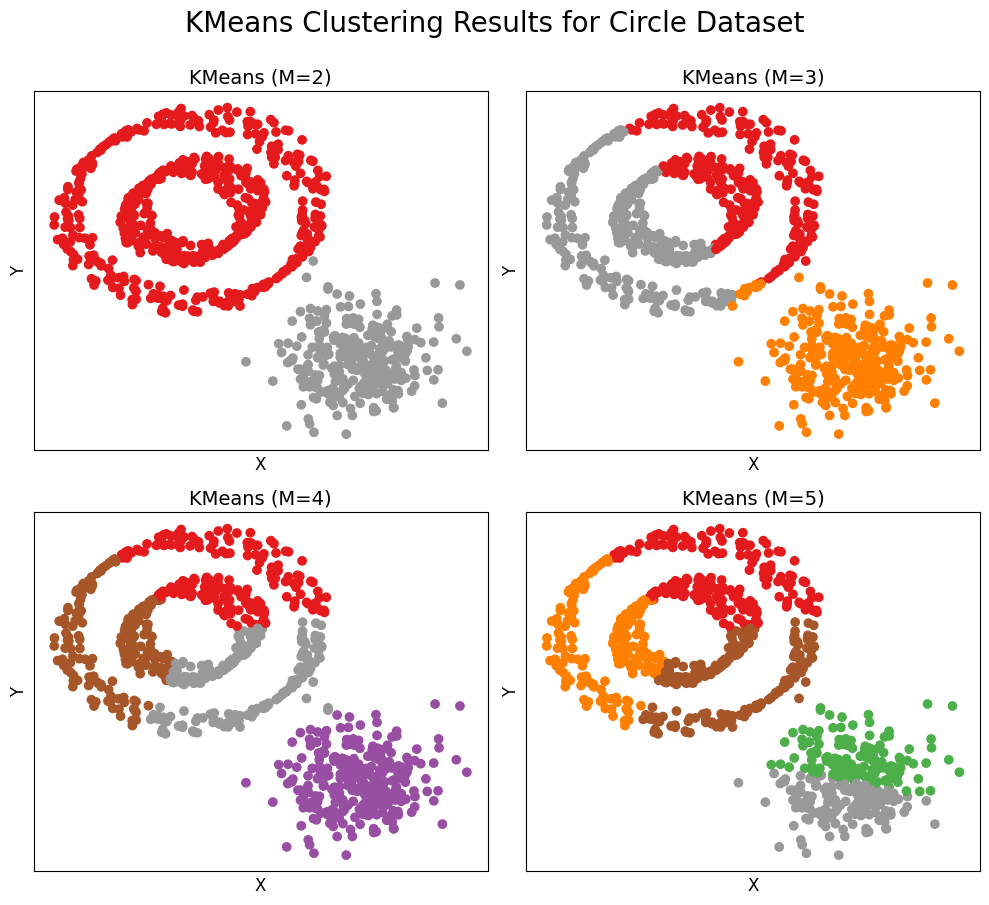

In [38]:
# Visualization for Circle Dataset
circle_data = datasets["Circle"]
circle_results = data_clustering_results["Circle"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("KMeans Clustering Results for Circle Dataset", fontsize=20, y=0.95)

for idx, m in enumerate(m_values):
    ax = axes[idx // 2, idx % 2]
    labels = circle_results[m]
    
    scatter = ax.scatter(circle_data[:, 0], circle_data[:, 1], c=labels, cmap="Set1")
    ax.set_title(f"KMeans (M={m})", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

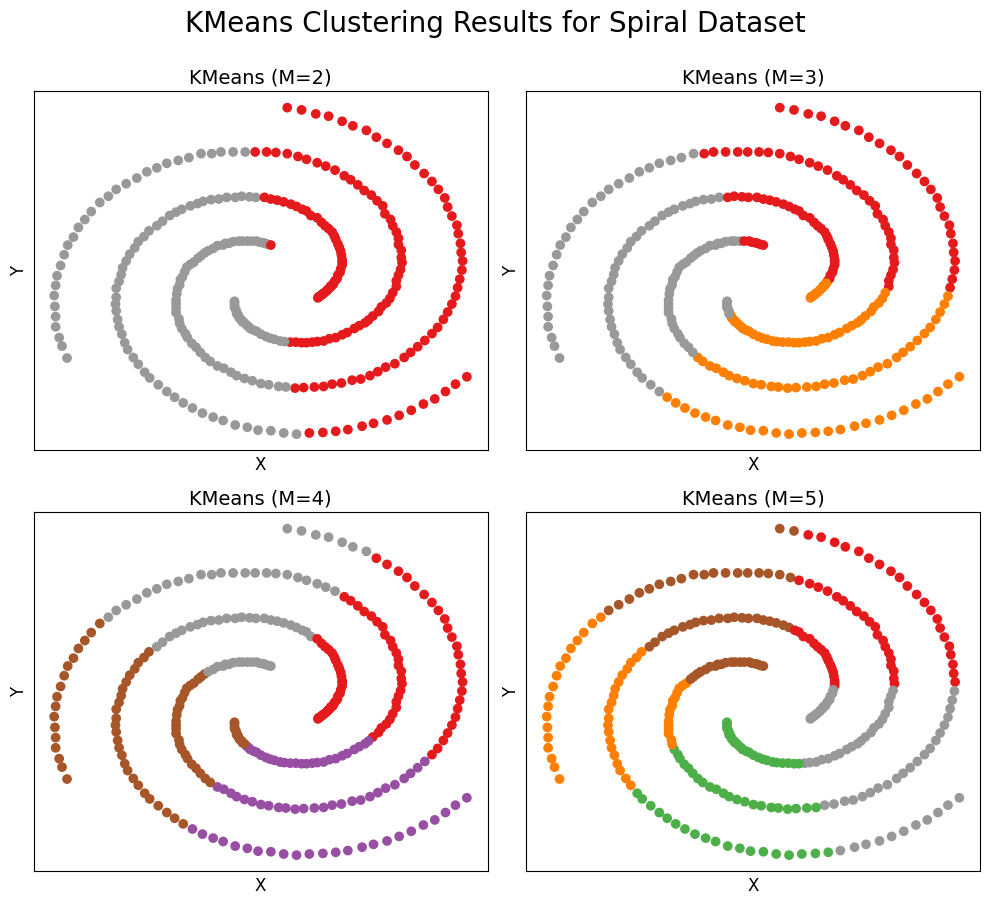

In [39]:
# Visualization for Spiral Dataset
spiral_data = datasets["Spiral"]
spiral_results = data_clustering_results["Spiral"]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("KMeans Clustering Results for Spiral Dataset", fontsize=20, y=0.95)

for idx, m in enumerate(m_values):
    ax = axes[idx // 2, idx % 2]
    labels = spiral_results[m]
    
    scatter = ax.scatter(spiral_data[:, 0], spiral_data[:, 1], c=labels, cmap="Set1")
    ax.set_title(f"KMeans (M={m})", fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("X", fontsize=12)
    ax.set_ylabel("Y", fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [ ]:
# ------------------------------------------------------------
# 1) Compute Silhouette Scores
# ------------------------------------------------------------
data = datasets["Spiral"]

sil_spec_10_reg = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["10"]["Regular"]["U_3"]
)
sil_spec_20_reg = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["20"]["Regular"]["U_3"]
)
sil_spec_40_reg = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["40"]["Regular"]["U_3"]
)

sil_spec_10_mut = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["10"]["Mutual"]["U_3"]
)
sil_spec_20_mut = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["20"]["Mutual"]["U_3"]
)
sil_spec_40_mut = silhouette_score(
    X=data, 
    labels=cluster_labels["Spiral"]["40"]["Mutual"]["U_3"]
)

# KMeans clustering result:
sil_kmeans = silhouette_score(
    X=data, 
    labels=data_clustering_results["Spiral"][3]
)

silhouette_scores = [
    sil_spec_10_reg, sil_spec_20_reg, sil_spec_40_reg,
    sil_spec_10_mut, sil_spec_20_mut, sil_spec_40_mut,
    sil_kmeans
]

best_sil_index = np.argmax(silhouette_scores)
best_sil_value = silhouette_scores[best_sil_index]
print("Silhouette Scores:", silhouette_scores)
print(f"Best Silhouette Score: {best_sil_value:.3f} (index={best_sil_index})")

# ------------------------------------------------------------
# 2) Compute Normalized Mutual Information Scores
# ------------------------------------------------------------
true_labels_spiral = spiral_df["cluster"]  

nmi_spec_10_reg = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["10"]["Regular"]["U_3"]
)
nmi_spec_20_reg = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["20"]["Regular"]["U_3"]
)
nmi_spec_40_reg = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["40"]["Regular"]["U_3"]
)

nmi_spec_10_mut = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["10"]["Mutual"]["U_3"]
)
nmi_spec_20_mut = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["20"]["Mutual"]["U_3"]
)
nmi_spec_40_mut = normalized_mutual_info_score(
    true_labels_spiral, 
    cluster_labels["Spiral"]["40"]["Mutual"]["U_3"]
)

nmi_kmeans = normalized_mutual_info_score(
    true_labels_spiral, 
    data_clustering_results["Spiral"][3]
)

nmi_scores = [
    nmi_spec_10_reg, nmi_spec_20_reg, nmi_spec_40_reg,
    nmi_spec_10_mut, nmi_spec_20_mut, nmi_spec_40_mut,
    nmi_kmeans
]

best_nmi_index = np.argmax(nmi_scores)
best_nmi_value = nmi_scores[best_nmi_index]
print("NMI Scores:", nmi_scores)
print(f"Best NMI Score: {best_nmi_value:.3f} (index={best_nmi_index})")

# ------------------------------------------------------------
# 3) Print final result
# ------------------------------------------------------------
methods = [
    "Spectral 10 Regular U_3",
    "Spectral 20 Regular U_3",
    "Spectral 40 Regular U_3",
    "Spectral 10 Mutual U_3",
    "Spectral 20 Mutual U_3",
    "Spectral 40 Mutual U_3",
    "KMeans (data_clustering_results)"
]

print("=== Final Results ===")
print(f"Best Silhouette: {methods[best_sil_index]} = {best_sil_value:.3f}")
print(f"Best NMI:        {methods[best_nmi_index]} = {best_nmi_value:.3f}")

Silhouette Scores: [np.float64(0.0013442973442779936), np.float64(0.0013442973442779936), np.float64(0.0013442973442779936), np.float64(0.0013442973442779936), np.float64(0.0013442973442779936), np.float64(0.0013442973442779936), np.float64(0.36036526477196046)]
Best Silhouette Score: 0.360 (index=6)
NMI Scores: [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.0004200321266529102)]
Best NMI Score: 1.000 (index=0)
=== Final Results ===
Best Silhouette: KMeans (data_clustering_results) = 0.360
Best NMI:        Spectral 10 Regular U_3 = 1.000
